# Импорт

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from joblib import dump


In [76]:
# tf.debugging.set_log_device_placement(True)
# import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


# Загружаем датасет и разбиваем её на выборку.

In [77]:
models = pd.read_csv(
    '../Data/DataLaba1/energy_task_moded_removed_nan.csv').drop('year', axis=1)
a = -1
b = 1
power = 2
models = models.apply(lambda s: 100*(s-s.mean())/s.std())
# models = models.apply(lambda s: a + (s - s.min())/(s.max() - s.min()) * (b-a))
sl = models.shape[0]
X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(power).fit_transform(
    models.drop('Appliances', axis=1)[0:sl]), models['Appliances'][0:sl], test_size=0.15)



In [78]:
X_train.shape


(15757, 435)

In [79]:
models.isna().sum()


Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
day            0
month          0
time           0
dtype: int64

In [80]:
models.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,time
count,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,18538.000000,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,...,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04
mean,3.139911e-15,-3.924888e-15,-6.279821e-14,-2.825919e-14,0.000000,-5.337848e-14,-2.197937e-14,-1.350162e-13,-9.419732e-15,-8.399261e-14,...,-2.276435e-14,-1.255964e-14,9.621863e-13,-2.354933e-15,3.139911e-15,-1.412960e-14,7.849776e-15,1.412960e-14,-6.279821e-15,-1.177466e-15
std,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
min,-8.552257e+01,-4.769330e+01,-3.044311e+02,-3.325080e+02,-193.312028,-4.896368e+02,-2.522995e+02,-3.219450e+02,-2.815373e+02,-2.618318e+02,...,-2.983386e+02,-2.334398e+02,-3.536231e+02,-3.738138e+02,-1.651350e+02,-3.166214e+02,-2.456401e+02,-1.782042e+02,-1.572701e+02,-1.718169e+02
25%,-4.650748e+01,-4.769330e+01,-5.790515e+01,-7.337092e+01,-69.382928,-6.254686e+01,-7.386177e+01,-7.175797e+01,-6.496646e+01,-8.112532e+01,...,-7.346820e+01,-7.051676e+01,-6.222345e+01,-6.419754e+01,-8.329617e+01,-7.899729e+01,-6.828676e+01,-8.349165e+01,-8.267315e+01,-8.764334e+01
50%,-3.675370e+01,-4.769330e+01,-5.743480e+00,-1.556148e+01,-15.837062,2.171175e+00,-8.749393e+00,-2.161802e+01,-9.602498e+00,-1.428235e+01,...,-1.564439e+01,-9.444116e+00,7.928326e+00,2.634007e+01,-1.509713e+01,1.435506e+01,-8.058055e+00,-6.182012e-01,-8.076175e+00,1.340124e+00
75%,2.261394e+00,-4.769330e+01,5.829428e+01,7.056622e+01,52.422541,6.991647e+01,5.205529e+01,7.773906e+01,6.041663e+01,7.176836e+01,...,6.691518e+01,5.595059e+01,7.313350e+01,7.999199e+01,5.992181e+01,1.435506e+01,6.669219e+01,8.225525e+01,6.652080e+01,8.551367e+01
max,9.483775e+02,8.363187e+02,2.836296e+02,5.807974e+02,432.704370,3.832794e+02,3.459391e+02,3.362315e+02,2.607039e+02,2.782132e+02,...,2.837545e+02,3.509784e+02,2.264781e+02,1.358794e+02,4.077369e+02,2.350061e+02,2.792781e+02,1.769678e+02,1.411178e+02,1.720922e+02


# Создание модели

In [81]:
model_class = tf.keras.models.Sequential()
model_class.add(tf.keras.layers.Dense(X_train.shape[1],
                                      activation='sigmoid', 
                                      input_shape=(X_train.shape[1],), 
                                      name='input', 
                                      kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93), 
                                    #   kernel_constraint=tf.keras.constraints.max_norm(1000.),
                                      bias_initializer=tf.keras.initializers.GlorotNormal,
                                      use_bias=True
                                      ))
model_class.add(tf.keras.layers.Dense(int(X_train.shape[1]*1.5),
                                      activation='relu', 
                                      name='hidden_layer_2', 
                                    #   bias_constraint=tf.keras.constraints.max_norm(1000.),
                                      kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                      use_bias=True,
                                      bias_initializer=tf.keras.initializers.GlorotNormal
                                      ))
model_class.add(tf.keras.layers.Dense(int(X_train.shape[1]*2),
                                      activation='sigmoid', 
                                      name='hidden_layer_3', 
                                      #   bias_constraint=tf.keras.constraints.max_norm(1000.),
                                      kernel_regularizer=tf.keras.regularizers.L1L2(
                                          l1=93, l2=93),
                                      use_bias=True,
                                      bias_initializer=tf.keras.initializers.GlorotNormal
                                      ))
model_class.add(tf.keras.layers.Dense(int(X_train.shape[1]*2.5),
                                      activation='relu',
                                      name='hidden_layer_4',
                                      #   bias_constraint=tf.keras.constraints.max_norm(1000.),
                                      kernel_regularizer=tf.keras.regularizers.L1L2(
                                          l1=93, l2=93),
                                      use_bias=True,
                                      bias_initializer=tf.keras.initializers.GlorotNormal
                                      ))
model_class.add(tf.keras.layers.Dense(int(X_train.shape[1]*3),
                                      activation='sigmoid',
                                      name='hidden_layer_5',
                                      #   bias_constraint=tf.keras.constraints.max_norm(1000.),
                                      kernel_regularizer=tf.keras.regularizers.L1L2(
                                          l1=93, l2=93),
                                      use_bias=True,
                                      bias_initializer=tf.keras.initializers.GlorotNormal
                                      ))
model_class.add(tf.keras.layers.Dense(int(X_train.shape[1]*3.5),
                                      activation='relu',
                                      name='hidden_layer_6',
                                      # bias_constraint=tf.keras.constraints.MinMaxNorm(min_value=10, max_value=100),
                                      kernel_regularizer=tf.keras.regularizers.L1L2(
                                          l1=93, l2=93),
                                      use_bias=True,
                                      bias_initializer=tf.keras.initializers.GlorotNormal
                                      ))
# model_class.add(tf.keras.layers.Dense(int(X_train.shape[1]*3),
#                                       activation='sigmoid',
#                                       name='hidden_layer_7',
#                                       # bias_constraint=tf.keras.constraints.MinMaxNorm(min_value=10, max_value=100),
#                                       # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
#                                       # use_bias=True,
#                                       # bias_initializer=tf.keras.initializers.GlorotNormal
#                                       ))
# model_class.add(tf.keras.layers.Dense(int(X_train.shape[1]*2.5),
#                                       activation='sigmoid',
#                                       name='hidden_layer_8',
#                                       # bias_constraint=tf.keras.constraints.MinMaxNorm(
#                                           # min_value=10, max_value=100),
#                                       # kernel_regularizer=tf.keras.regularizers.L1L2(
#                                           # l1=93, l2=93),
#                                       # use_bias=True,
#                                       # bias_initializer=tf.keras.initializers.GlorotNormal
#                                       ))
# model_class.add(tf.keras.layers.Dense(int(X_train.shape[1]*2),
#                                       activation='sigmoid',
#                                       name='hidden_layer_9',
#                                       # bias_constraint=tf.keras.constraints.MinMaxNorm(
#                                           # min_value=10, max_value=100),
#                                       # kernel_regularizer=tf.keras.regularizers.L1L2(
#                                           # l1=93, l2=93),
#                                       # use_bias=True,
#                                       # bias_initializer=tf.keras.initializers.GlorotNormal
#                                       ))
# model_class.add(tf.keras.layers.Dense(int(X_train.shape[1]*1.5),
#                                       activation='sigmoid',
#                                       name='hidden_layer_10',
#                                       # bias_constraint=tf.keras.constraints.MinMaxNorm(
#                                           # min_value=10, max_value=100),
#                                       # kernel_regularizer=tf.keras.regularizers.L2(l2=93),
#                                       # use_bias=True,
#                                       # bias_initializer=tf.keras.initializers.GlorotNormal
#                                       ))
# model_class.add(tf.keras.layers.Dense(int(X_train.shape[1]*1),
#                                       activation='sigmoid',
#                                       name='hidden_layer_11',
#                                       # bias_constraint=tf.keras.constraints.MinMaxNorm(
#                                           # min_value=10, max_value=100),
#                                       # kernel_regularizer=tf.keras.regularizers.L1(
#                                           # l1=93),
#                                       # use_bias=True,
#                                       # bias_initializer=tf.keras.initializers.GlorotNormal
#                                       ))
model_class.add(tf.keras.layers.Dense(1,
                                      name='output', 
                                      activation='sigmoid',
                                      # bias_constraint=tf.keras.constraints.MinMaxNorm(min_value=10, max_value=100), 
                                      kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                      use_bias=True,
                                      bias_initializer=tf.keras.initializers.HeNormal
                                      ))
model_class.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 435)               189660    
                                                                 
 hidden_layer_2 (Dense)      (None, 652)               284272    
                                                                 
 hidden_layer_3 (Dense)      (None, 870)               568110    
                                                                 
 hidden_layer_4 (Dense)      (None, 1087)              946777    
                                                                 
 hidden_layer_5 (Dense)      (None, 1305)              1419840   
                                                                 
 hidden_layer_6 (Dense)      (None, 1522)              1987732   
                                                                 
 output (Dense)              (None, 1)                

In [8]:
model_coder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(X_train.shape[1], input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1,)
])


## Компиляция

In [82]:
model_class.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mse', 'mae'],
    jit_compile=True
)


# Обучение

In [83]:
activation = ['softmax', 'softplus', 'softsign',
              'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation)


In [84]:
model_class.fit(
    X_train,
    y_train,
    validation_split=0.7,
    epochs=10,
    batch_size=10,
    workers=6,
    use_multiprocessing=True,
)


Epoch 1/10
473/473 [==============================] - 46s 92ms/step - loss: 653064.3125 - mse: 10388.3896 - mae: 60.3541 - val_loss: 72586.7891 - val_mse: 9992.4463 - val_mae: 59.4166
Epoch 2/10
473/473 [==============================] - 40s 86ms/step - loss: 71430.1641 - mse: 10388.4033 - mae: 60.3558 - val_loss: 70179.5703 - val_mse: 9992.4502 - val_mae: 59.4172
Epoch 3/10
473/473 [==============================] - 41s 86ms/step - loss: 71069.7500 - mse: 10388.3916 - mae: 60.3562 - val_loss: 70897.8750 - val_mse: 9992.4502 - val_mae: 59.4177
Epoch 4/10
473/473 [==============================] - 42s 88ms/step - loss: 71337.6484 - mse: 10388.3848 - mae: 60.3575 - val_loss: 71196.9062 - val_mse: 9992.4482 - val_mae: 59.4189
Epoch 5/10
473/473 [==============================] - 41s 88ms/step - loss: 72372.1016 - mse: 10388.3916 - mae: 60.3577 - val_loss: 72211.1406 - val_mse: 9992.4473 - val_mae: 59.4192
Epoch 6/10
473/473 [==============================] - 41s 87ms/step - loss: 73158.00

In [12]:
tf.keras.losses

<module 'tensorflow.keras.losses' from 'c:\\Users\\Mike\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\keras\\api\\_v2\\keras\\losses\\__init__.py'>

# Predict

In [85]:
y_predicted = model_class.predict(X_test).T[0]


87/87 [==============================] - 1s 9ms/step


# Оценка качества 

In [86]:
y_all = model_class.predict(PolynomialFeatures(power).fit_transform(
    models.drop('Appliances', axis=1)[0:sl])).T[0]


580/580 [==============================] - 5s 8ms/step


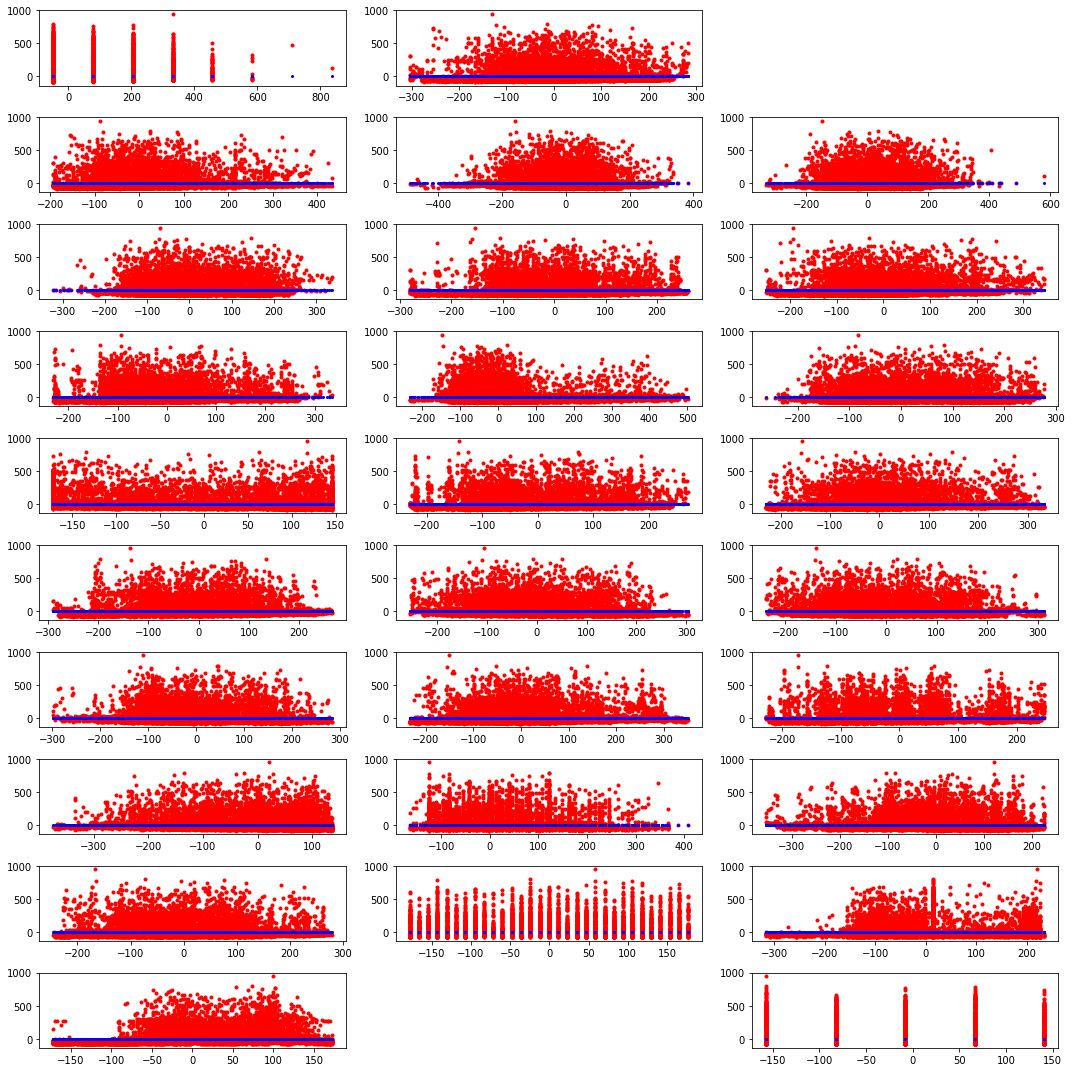

In [87]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(15)
c = models.drop('Appliances', axis=1).columns
xl = c.shape[0] // 3 + (c.shape[0] % 3 > 0)
yl = 3
gs = gridspec.GridSpec(xl, yl)
z=0
k=0
for i in c:
  z = z % xl
  k = k % yl
  ax = fig.add_subplot(gs[int(z), int(k)])
  ax.plot(models[i], models['Appliances'], 'ro', markersize=3)
  ax.plot(models[i], y_all, 'bo', markersize=2)
  k+=1
  z+=(k % 3) // 2
  

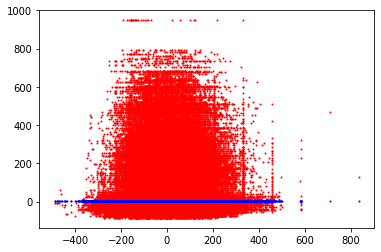

In [88]:
plt.plot(models.drop('Appliances', axis=1)[0:sl],
         models['Appliances'][0:sl], 'ro', markersize=1)
plt.plot(models.drop('Appliances', axis=1)[0:sl], y_all, 'bo', markersize=1)


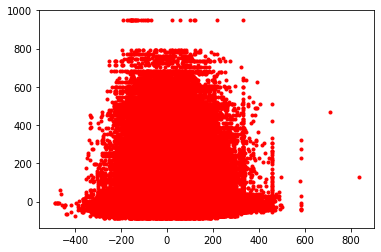

In [89]:
plt.plot(models.drop('Appliances', axis=1)[0:sl],
         models['Appliances'][0:sl], 'ro', markersize=3)


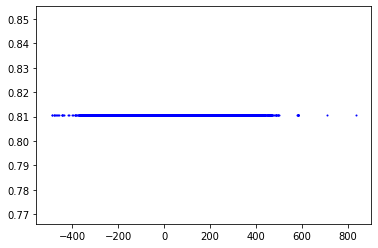

In [90]:
plt.plot(models.drop('Appliances', axis=1)[0:sl], y_all, 'bo', markersize=1)


In [91]:
print(f"MAE: {mean_absolute_error(y_predicted, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted, y_test)}',
      f'MSE: {mean_squared_error(y_predicted, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted, y_test)}',
      f'R^2: {r2_score(y_predicted, y_test)}',
      sep='\n')

MAE: 57.90754850323479
RMSE: 9370.518408244838
MSE: 96.80143804843416
MAPE: 71.43536912397248
R^2: 0.0
